In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [10]:
G = nx.Graph()
num_nodes = 5
for i in range(num_nodes):
    G.add_node(i)
for i in range(num_nodes):
    for j in range(num_nodes):
        G.add_weighted_edges_from([(0,1,2), (1,2,3), (2,3,1), (3,4,2), (0,4,1)])
G.edges.data('weight')

EdgeDataView([(0, 1, 2), (0, 4, 1), (1, 2, 3), (2, 3, 1), (3, 4, 2)])

In [11]:
nx.shortest_path_length(G, source=1, 
                #  target=4, 
                 weight='weight')

{1: 0, 0: 2, 2: 3, 4: 3, 3: 4}

In [12]:
G.nodes

NodeView((0, 1, 2, 3, 4))

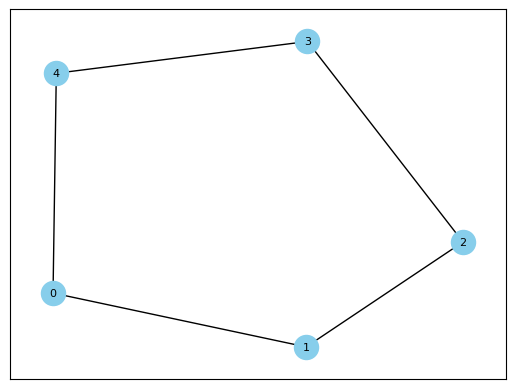

In [13]:
pos = nx.spring_layout(G, seed=225)  # Seed for reproducible layout
nx.draw_networkx(G, pos, with_labels=True, node_size=300, node_color="skyblue", font_size=8)
plt.show()

In [14]:
def json_to_graph(json):
    G = nx.Graph()
    G.add_nodes_from(json)
    return G

In [18]:
# json = [[1, {'name':1, 'capacity':200}], [2, {'name':2, 'capacity':200}]]
json_to_graph(json)

In [87]:
import json
# Opening JSON file
f1 = open('../static/lib_sections.json')
lib_sections = json.load(f1)

f2 = open('../static/sections_attrs.json')
sections_attrs = json.load(f2)

f3 = open('../static/connections.json')
connections = json.load(f3)

In [88]:
def dict_to_graph(library_dict: dict, sections_attrs: dict, connections: dict):
    """
    Frontend request must be in format of static/lib_sections.json
    sections_attrs follow the format of static/sections_attrs.json
    """
    G = nx.Graph(submission_name=library_dict['submission_name'])
    for levels_dict in library_dict['levels']:
        level_id = f"{levels_dict['level']}"
        G.add_node(level_id)
        for sections_dict in levels_dict['sections']:
            section_id = f"{levels_dict['level']}-{sections_dict['seat_type']}"
            G.add_node(section_id, **sections_dict, **sections_attrs[sections_dict['seat_type']], level=levels_dict['level'])
            G.add_edge(level_id, section_id)
    for connection in connections['gates']:
        G.add_edge(connection['gate_id'], connection['connected_to'])
    for connection in connections['levels']:
        G.add_edge(connection['level_id'], connection['connected_to'])
    return G

G = dict_to_graph(lib_sections, sections_attrs, connections)

In [89]:
G.nodes['clb_3-movable_seat']

{'seat_type': 'movable_seat',
 'capacity': 100,
 'privacy': 0,
 'comfort': 0,
 'occupied': 0,
 'scenery': 0,
 'lighting': 10,
 'level': 'clb_3'}

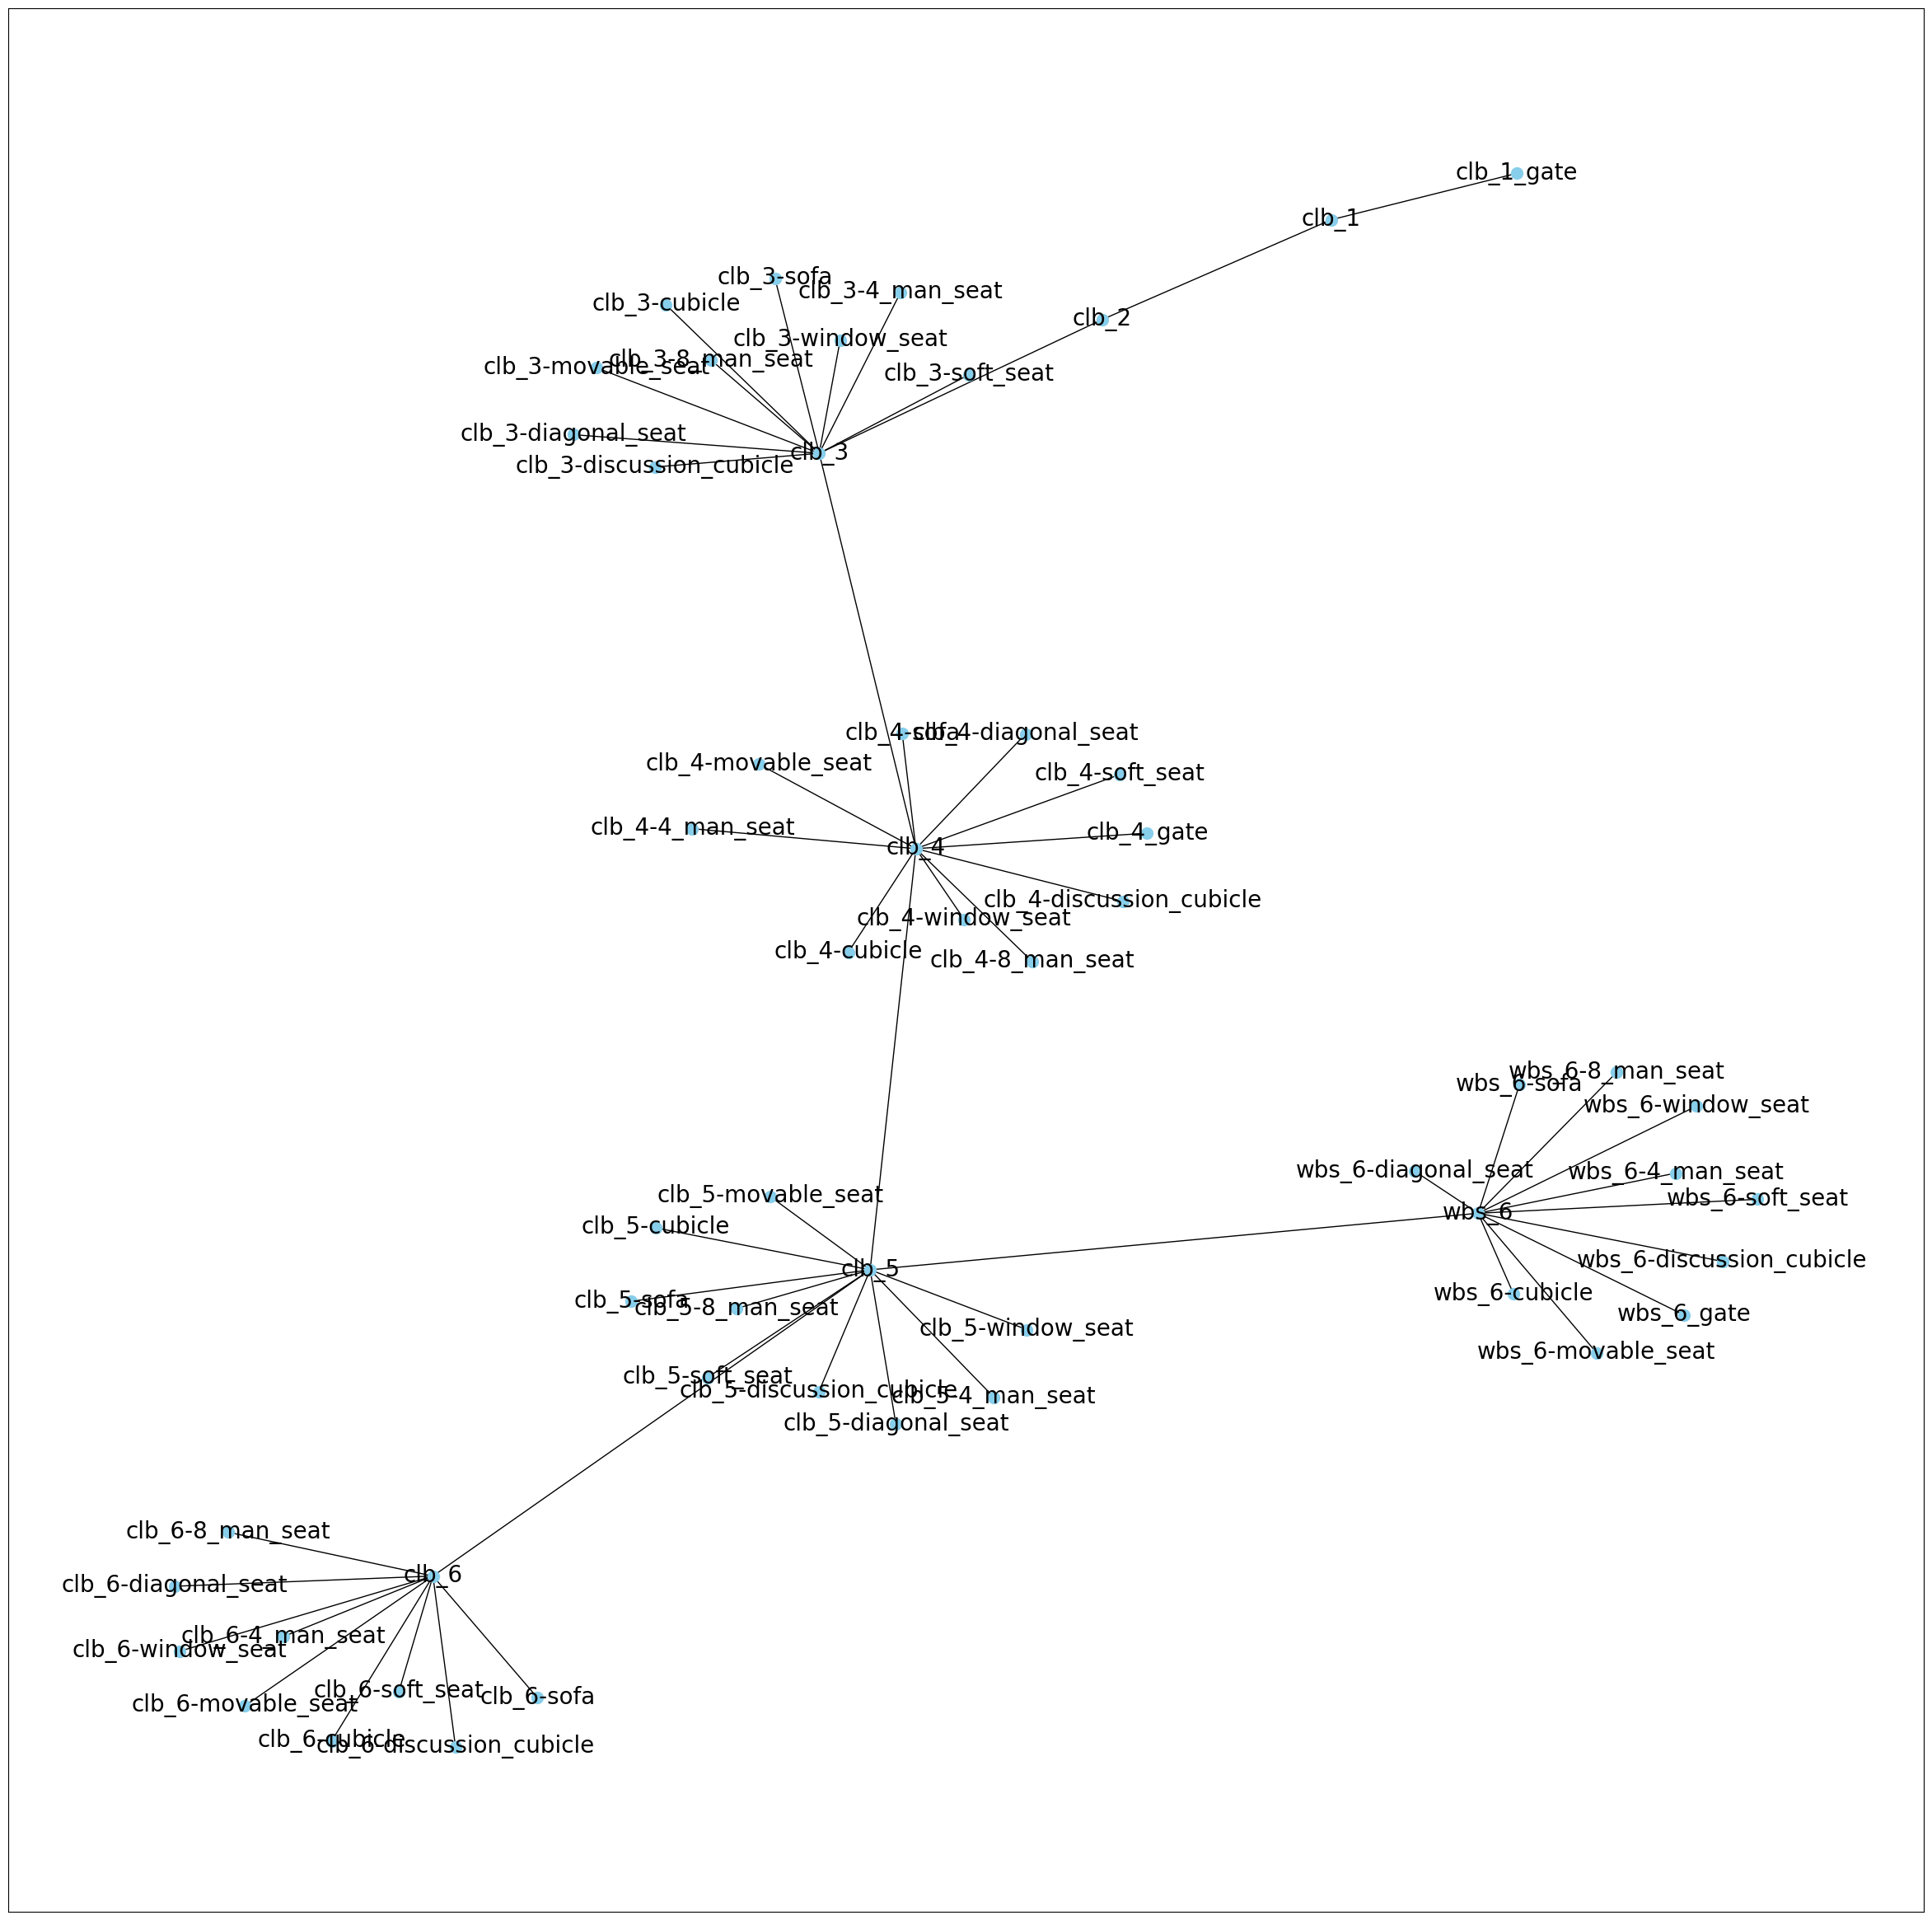

In [90]:
plt.figure(figsize=(30,30))
pos = nx.spring_layout(G, seed=225)  # Seed for reproducible layout
nx.draw_networkx(G, pos, with_labels=True, node_size=100, node_color="skyblue", font_size=20)
plt.show()